<a href="https://colab.research.google.com/github/OliverMateusDS/Data-Science/blob/main/Analise_de_dados_vendas_X_cadastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0 - Verificação inicial:

In [ ]:
import pandas as pd

# Carregar os dados
url_cadastro = 'https://raw.githubusercontent.com/carollzambelli/python-course/refs/heads/main/Projeto/Analise/dados/cadastro.csv'
url_vendas = 'https://raw.githubusercontent.com/carollzambelli/python-course/refs/heads/main/Projeto/Analise/dados/vendas.csv'

cadastro = pd.read_csv(url_cadastro, sep=';')
vendas = pd.read_csv(url_vendas, sep=';')

# Exibir as primeiras linhas
print("Cadastro:")
print(cadastro.head())
print("\nVendas:")
print(vendas.head())

# Verificar informações básicas
print("\nCadastro - Info:")
print(cadastro.info())
print("\nVendas - Info:")
print(vendas.info())

Cadastro:
   cod_cadastro estado_civil        grau_instrucao  num_filhos  salario  \
0             1     solteiro  1-ensino fundamental         NaN     4.00   
1             2       casado  1-ensino fundamental         1.0     4.56   
2             3       casado  1-ensino fundamental         2.0     5.25   
3             4     solteiro        2-ensino medio         NaN     5.73   
4             5     solteiro  1-ensino fundamental         NaN     6.26   

   idade_anos reg_procedencia  
0          26        interior  
1          32         capital  
2          36         capital  
3          20           outra  
4          40           outra  

Vendas:
   cod_venda  cod_cadastro       produto  valor
0          1             1  Refrigerante    6.5
1          2             2     Chocolate    4.0
2          3             3          Suco    5.0
3          4             4       Bolacha    3.5
4          5             5        Cereal   11.9

Cadastro - Info:
<class 'pandas.core.frame.DataFr

### 1 - Padronização:

In [ ]:
# Padronizar colunas de texto
colunas_texto = ['estado_civil', 'grau_instrucao', 'reg_procedencia']
for col in colunas_texto:
    cadastro[col] = cadastro[col].astype(str).str.strip().str.lower()

vendas['produto'] = vendas['produto'].astype(str).str.strip().str.lower()

import numpy as np

# Substituir strings vazias por NaN
cadastro.replace('', np.nan, inplace=True)
vendas.replace('', np.nan, inplace=True)

colunas_numericas = ['salario', 'num_filhos', 'idade_anos']
for col in colunas_numericas:
    cadastro[col] = pd.to_numeric(cadastro[col], errors='coerce')

print(cadastro.dtypes)
print(cadastro.isnull().sum())
print(cadastro.head())
print(vendas.head())

cod_cadastro         int64
estado_civil        object
grau_instrucao      object
num_filhos         float64
salario            float64
idade_anos           int64
reg_procedencia     object
dtype: object
cod_cadastro        0
estado_civil        0
grau_instrucao      0
num_filhos         16
salario             0
idade_anos          0
reg_procedencia     0
dtype: int64
   cod_cadastro estado_civil        grau_instrucao  num_filhos  salario  \
0             1     solteiro  1-ensino fundamental         NaN     4.00   
1             2       casado  1-ensino fundamental         1.0     4.56   
2             3       casado  1-ensino fundamental         2.0     5.25   
3             4     solteiro        2-ensino medio         NaN     5.73   
4             5     solteiro  1-ensino fundamental         NaN     6.26   

   idade_anos reg_procedencia  
0          26        interior  
1          32         capital  
2          36         capital  
3          20           outra  
4          40      

### 2 - Merge das planilhas

In [ ]:
# Merge das planilhas pela coluna 'cod_cadastro'
df_merged = pd.merge(vendas, cadastro, on='cod_cadastro', how='left')

### 3 - Analise de gastos por: Cliente, Regiao / Produto mais vendido

Cliente que mais gastou: 27 (R$ 47.80)
Cliente que menos gastou: 16 (R$ 2.80)
Região de procedência que mais gastou: interior (R$ 189.93)
Produto mais vendido: chocolate (7 unidades)


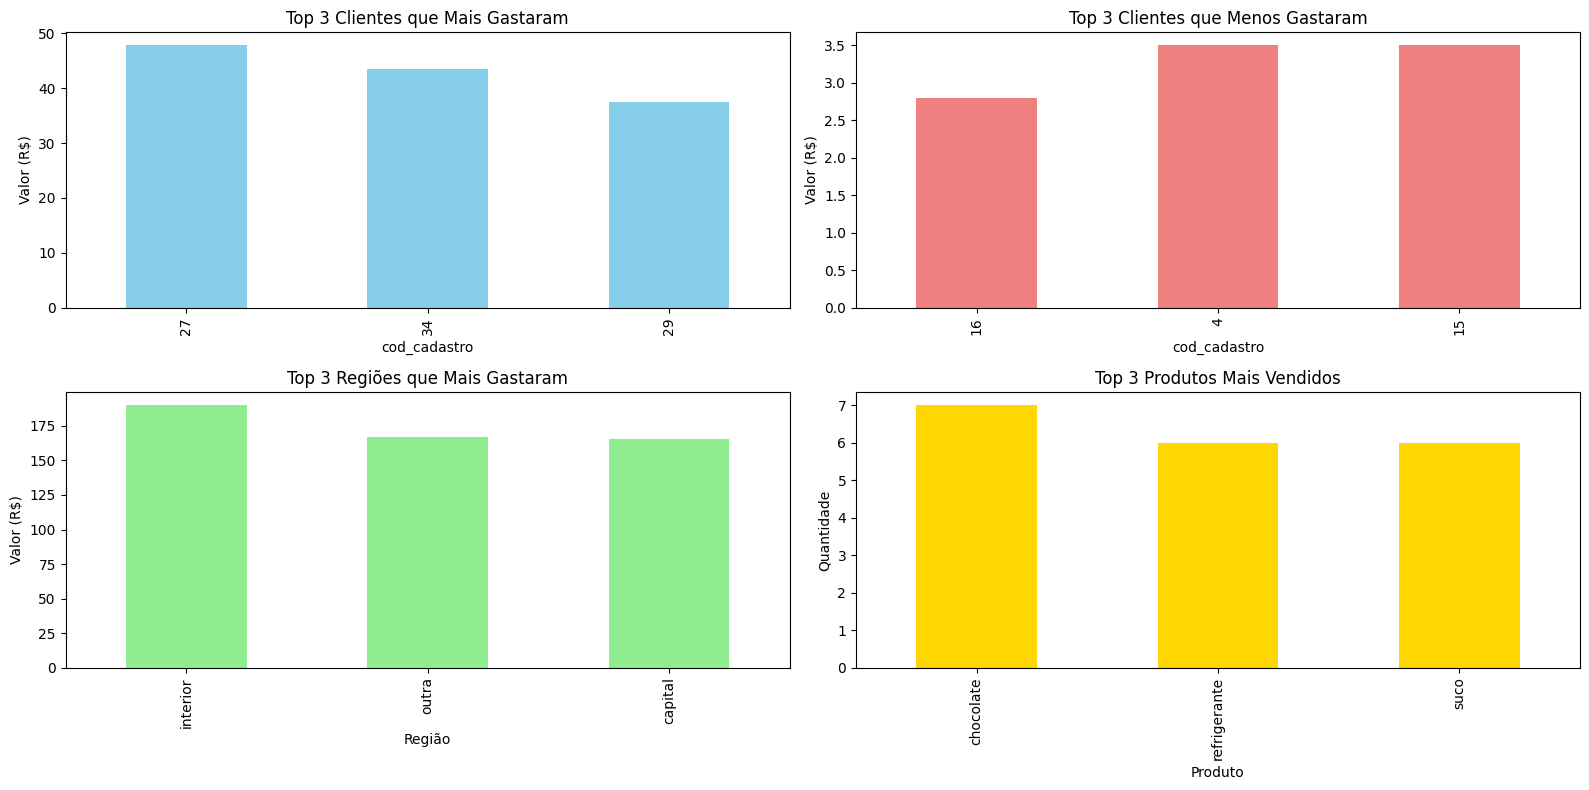

In [ ]:
# Total gasto por cliente
gasto_por_cliente = df_merged.groupby('cod_cadastro')['valor'].sum()

# Cliente que mais gastou
cliente_mais_gastou = gasto_por_cliente.idxmax()
valor_mais_gastou = gasto_por_cliente.max()

# Cliente que menos gastou
cliente_menos_gastou = gasto_por_cliente.idxmin()
valor_menos_gastou = gasto_por_cliente.min()

print(f"Cliente que mais gastou: {cliente_mais_gastou} (R$ {valor_mais_gastou:.2f})")
print(f"Cliente que menos gastou: {cliente_menos_gastou} (R$ {valor_menos_gastou:.2f})")

# Total gasto por reg_procedencia
gasto_por_regiao = df_merged.groupby('reg_procedencia')['valor'].sum().sort_values(ascending=False)

# Região que mais gastou
regiao_top = gasto_por_regiao.idxmax()
valor_top = gasto_por_regiao.max()

print(f"Região de procedência que mais gastou: {regiao_top} (R$ {valor_top:.2f})")

# Contar quantidade de vendas por produto
vendas_por_produto = df_merged['produto'].value_counts()

# Produto mais vendido
produto_top = vendas_por_produto.idxmax()
quantidade_top = vendas_por_produto.max()

print(f"Produto mais vendido: {produto_top} ({quantidade_top} unidades)")

# GRÁFICOS COMPARATIVOS

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

# Top 3 clientes que mais gastaram
plt.subplot(2, 2, 1)
gasto_por_cliente.sort_values(ascending=False).head(3).plot(kind='bar', color='skyblue')
plt.title('Top 3 Clientes que Mais Gastaram')
plt.ylabel('Valor (R$)')
plt.xlabel('cod_cadastro')

# Top 3 clientes que menos gastaram (excluindo zero)
plt.subplot(2, 2, 2)
gasto_por_cliente[gasto_por_cliente > 0].sort_values().head(3).plot(kind='bar', color='lightcoral')
plt.title('Top 3 Clientes que Menos Gastaram')
plt.ylabel('Valor (R$)')
plt.xlabel('cod_cadastro')

# Top 3 regiões que mais gastaram
plt.subplot(2, 2, 3)
gasto_por_regiao.head(3).plot(kind='bar', color='lightgreen')
plt.title('Top 3 Regiões que Mais Gastaram')
plt.ylabel('Valor (R$)')
plt.xlabel('Região')

# Top 3 produtos mais vendidos
plt.subplot(2, 2, 4)
vendas_por_produto.head(3).plot(kind='bar', color='gold')
plt.title('Top 3 Produtos Mais Vendidos')
plt.ylabel('Quantidade')
plt.xlabel('Produto')

plt.tight_layout()
plt.show()

### 4 - Analise segmentação de clientes

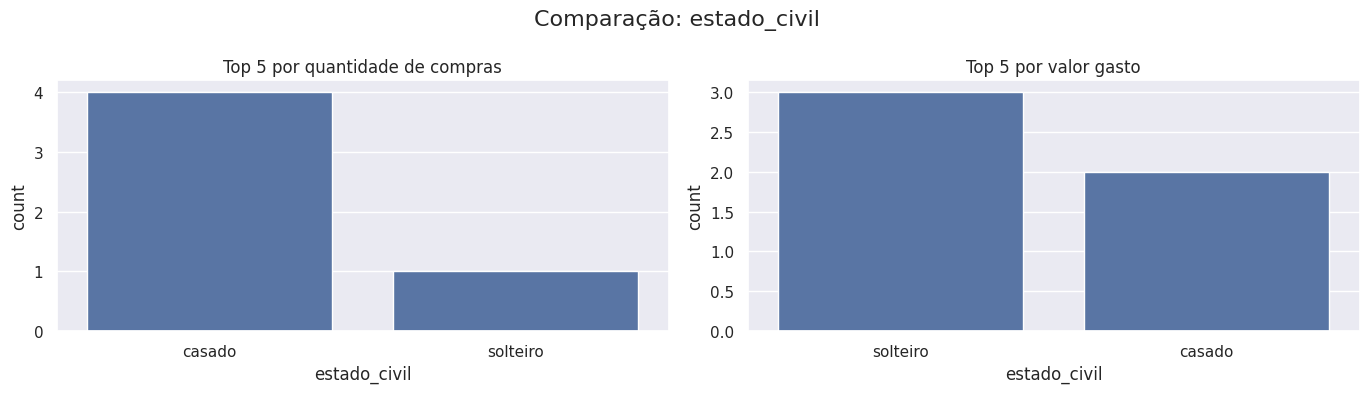

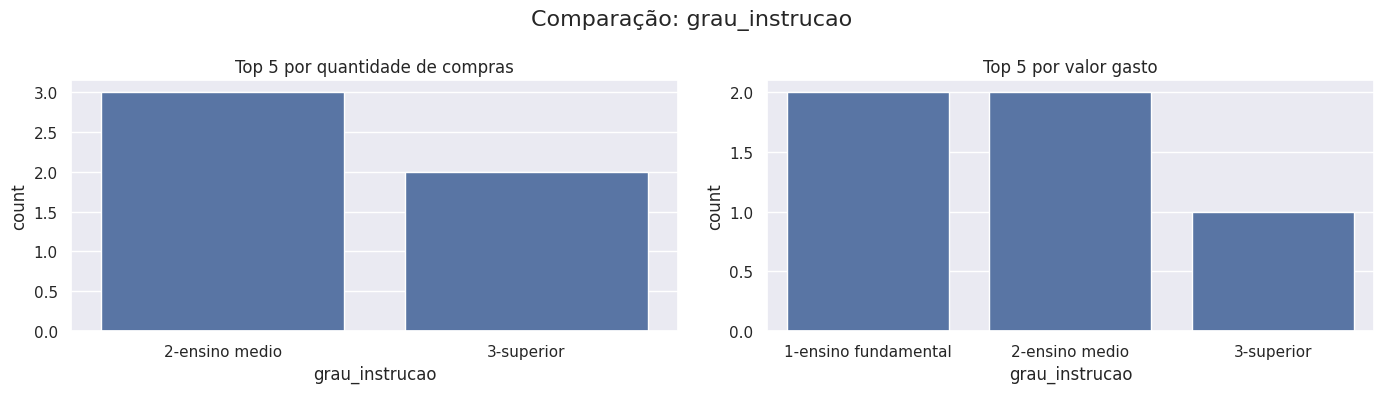

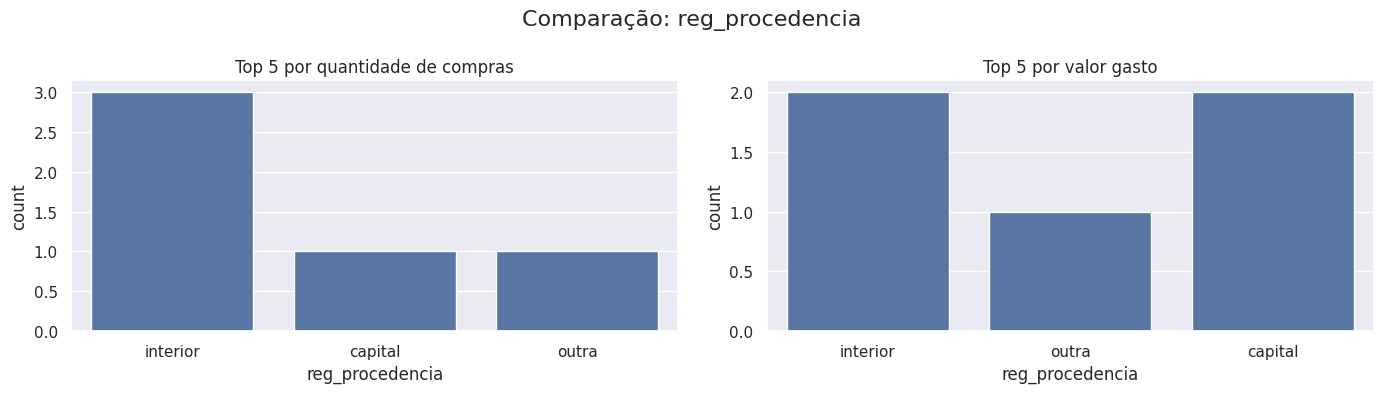

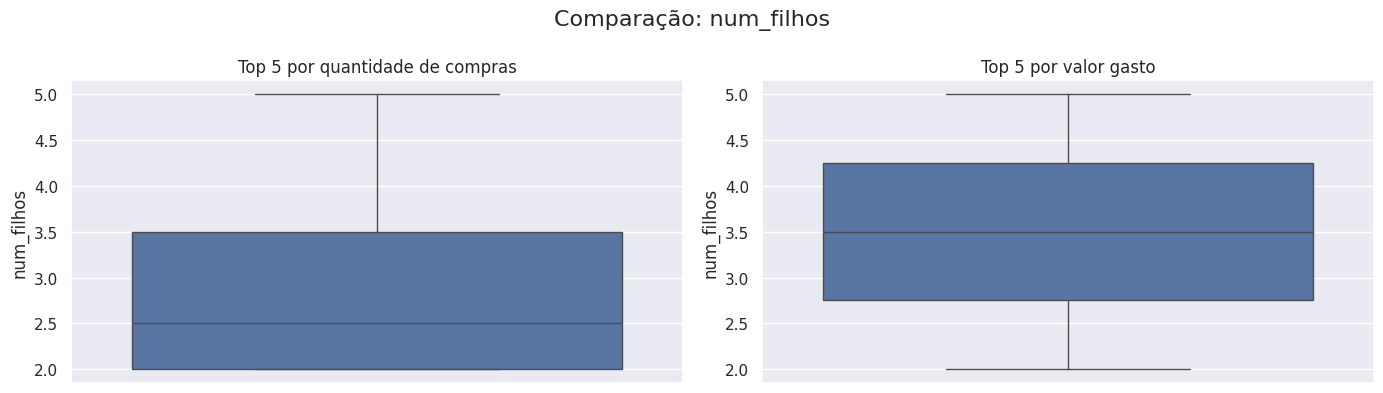

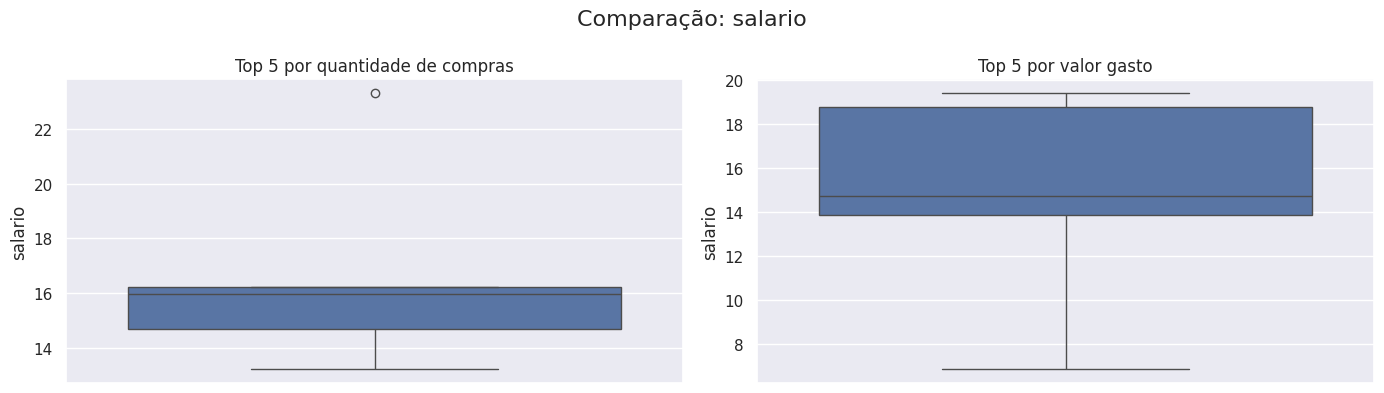

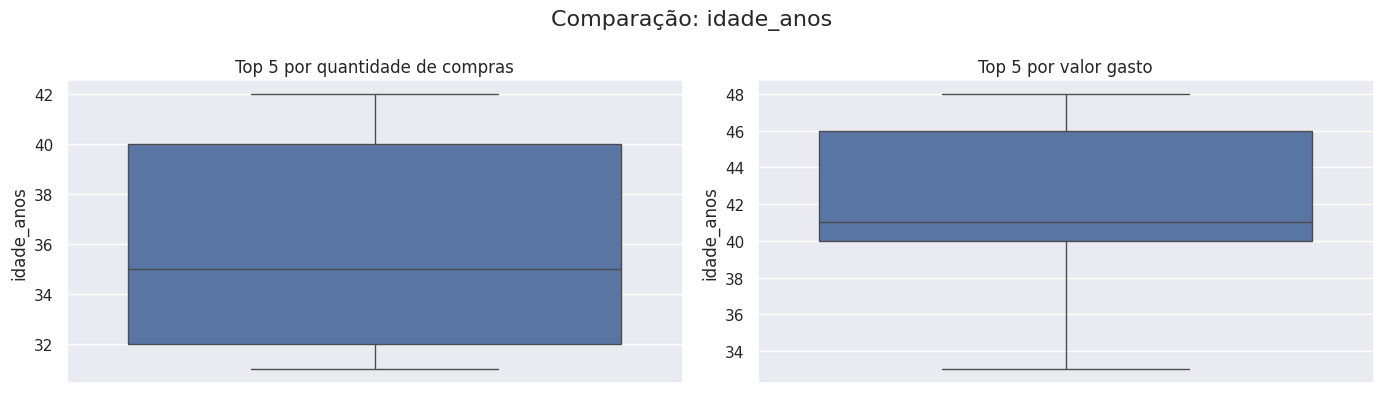

In [ ]:
# Estilo dos gráficos
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 5)

# Identificar os Top 5 por quantidade e por valor
top_quantidade = df_merged.groupby('cod_cadastro').size().sort_values(ascending=False).head(5).index
top_valor = df_merged.groupby('cod_cadastro')['valor'].sum().sort_values(ascending=False).head(5).index

# Dados dos Top 5
top_q_info = cadastro[cadastro['cod_cadastro'].isin(top_quantidade)].copy()
top_v_info = cadastro[cadastro['cod_cadastro'].isin(top_valor)].copy()

# Função para gráfico comparativo
def plot_comparativo(col, tipo='categorica'):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f'Comparação: {col}', fontsize=16)

    if tipo == 'categorica':
        sns.countplot(data=top_q_info, x=col, ax=axes[0])
        axes[0].set_title('Top 5 por quantidade de compras')

        sns.countplot(data=top_v_info, x=col, ax=axes[1])
        axes[1].set_title('Top 5 por valor gasto')

    else:
        sns.boxplot(data=top_q_info, y=col, ax=axes[0])
        axes[0].set_title('Top 5 por quantidade de compras')

        sns.boxplot(data=top_v_info, y=col, ax=axes[1])
        axes[1].set_title('Top 5 por valor gasto')

    plt.tight_layout()
    plt.show()

# Gráficos categóricos
plot_comparativo('estado_civil', tipo='categorica')
plot_comparativo('grau_instrucao', tipo='categorica')
plot_comparativo('reg_procedencia', tipo='categorica')

# Gráficos numéricos
plot_comparativo('num_filhos', tipo='numerica')
plot_comparativo('salario', tipo='numerica')
plot_comparativo('idade_anos', tipo='numerica')


### 5 - Analise Filhos x Grau de instrução

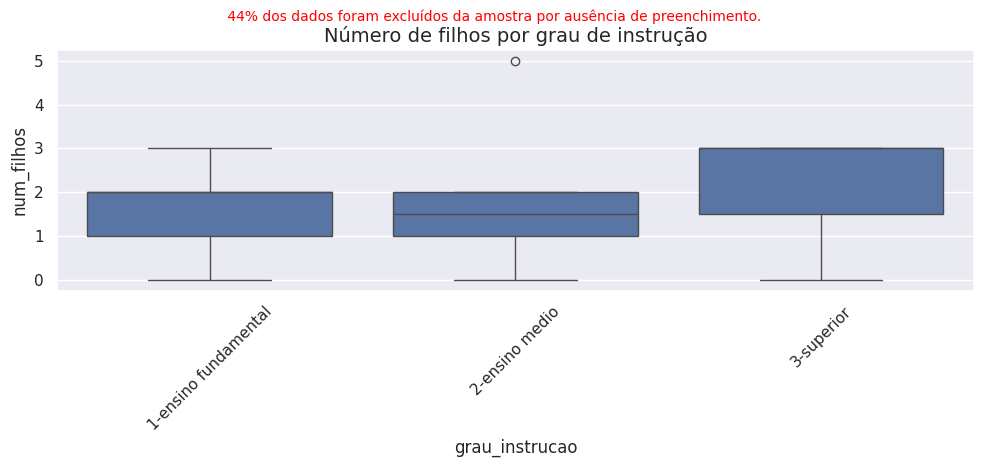

grau_instrucao
2-ensino medio          1.583333
1-ensino fundamental    1.600000
3-superior              2.000000
Name: num_filhos, dtype: float64
    cod_cadastro        grau_instrucao  num_filhos
0              1  1-ensino fundamental         NaN
3              4        2-ensino medio         NaN
4              5  1-ensino fundamental         NaN
6              7  1-ensino fundamental         NaN
7              8  1-ensino fundamental         NaN
9             10        2-ensino medio         NaN
11            12  1-ensino fundamental         NaN
12            13        2-ensino medio         NaN
15            16        2-ensino medio         NaN
18            19            3-superior         NaN
19            20        2-ensino medio         NaN
21            22        2-ensino medio         NaN
22            23  1-ensino fundamental         NaN
26            27  1-ensino fundamental         NaN
30            31            3-superior         NaN
33            34            3-superio

In [ ]:
# grafico Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=cadastro, x='grau_instrucao', y='num_filhos')
plt.title('Número de filhos por grau de instrução', fontsize=14)
plt.suptitle(' 44% dos dados foram excluídos da amostra por ausência de preenchimento.', fontsize=10, y=0.93, color='red')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# media de filhos
media_filhos_por_instrucao = cadastro.groupby('grau_instrucao')['num_filhos'].mean().sort_values()
print(media_filhos_por_instrucao)

# Mostrar onde há dados ausentes
dados_faltantes = cadastro[cadastro['num_filhos'].isna()]
print(dados_faltantes[['cod_cadastro', 'grau_instrucao', 'num_filhos']])

faltantes_por_instrucao = cadastro[cadastro['num_filhos'].isna()].groupby('grau_instrucao').size()
print("Quantidade de ausentes por grau de instrução:")
print(faltantes_por_instrucao)


### 6 - Classificação: Diamante, Ouro, Prata considerando gasto + frequência

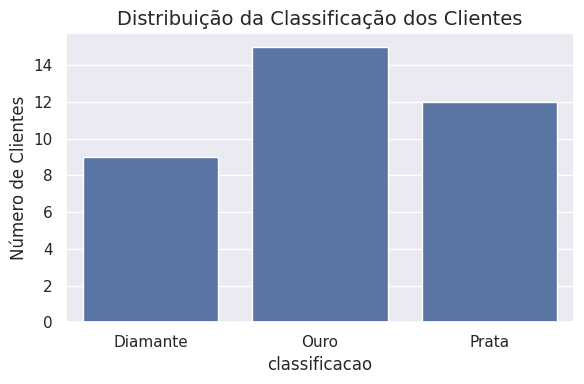

In [ ]:
# Gasto total por cliente
gasto = df_merged.groupby('cod_cadastro')['valor'].sum()

# Frequência de compras por cliente
frequencia = df_merged.groupby('cod_cadastro').size()

# Unir gasto e frequência em um DataFrame
df_cliente = pd.DataFrame({'gasto': gasto, 'frequencia': frequencia})

# Definir limites usando percentis (33% e 66%)
gasto_limites = df_cliente['gasto'].quantile([0.33, 0.66])
freq_limites = df_cliente['frequencia'].quantile([0.33, 0.66])

def classifica(row):
    gasto = row['gasto']
    freq = row['frequencia']

    # Pontuação para gasto
    if gasto <= gasto_limites[0.33]:
        p_gasto = 1
    elif gasto <= gasto_limites[0.66]:
        p_gasto = 2
    else:
        p_gasto = 3

    # Pontuação para frequência
    if freq <= freq_limites[0.33]:
        p_freq = 1
    elif freq <= freq_limites[0.66]:
        p_freq = 2
    else:
        p_freq = 3

    soma = p_gasto + p_freq

    if soma >= 5:
        return 'Diamante'
    elif soma >= 3:
        return 'Ouro'
    else:
        return 'Prata'

df_cliente['classificacao'] = df_cliente.apply(classifica, axis=1)

# Mapeia a classificação para o cadastro
cadastro = cadastro.set_index('cod_cadastro')
cadastro['classificacao'] = df_cliente['classificacao']
cadastro = cadastro.reset_index()

# Gráfico de classificação dos clientes

plt.figure(figsize=(6, 4))
ax = sns.countplot( x='classificacao', data=cadastro, order=['Diamante', 'Ouro', 'Prata'])
ax.set_title('Distribuição da Classificação dos Clientes', fontsize=14)
ax.set_ylabel('Número de Clientes')
plt.tight_layout()
plt.show()